## **Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.**
 Min-max scaling is a feature scaling technique used in feature extraction for scaling a given datapoint values between range [0,1]
- it is specifically used in deeplearning(where input type is image)
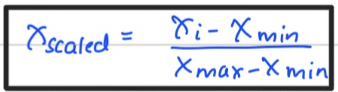

In [4]:
#Example of min-max scaling
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df = sns.load_dataset('taxis')
df.head()

#creating object
min_max = MinMaxScaler()
pd.DataFrame(min_max.fit_transform(df[['distance','fare','tip']]),columns=['distance','fare','tip'])

,distance,fare,tip
0,0.043597,0.040268,0.064759
1,0.021526,0.026846,0.000000
2,0.037330,0.043624,0.071084
3,0.209809,0.174497,0.185241
4,0.058856,0.053691,0.033133
...,...,...,...
6428,0.020436,0.023490,0.031928
6429,0.510627,0.382550,0.000000
6430,0.112807,0.100671,0.000000
6431,0.030518,0.033557,0.000000


## **Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.**
Unit vector technique in feature scaling is a method that scales the features in a dataset to unit vectors. This means that each feature will have a magnitude of 1. Unit vector scaling is often **used in machine learning algorithms that are <u>sensitive to the magnitude of the features</u>, such as principal component analysis (PCA) and linear discriminant analysis (LDA).**

Min-max scaling is another method of feature scaling that is commonly used in machine learning. Min-max scaling scales the features in a dataset to a range of 0 to 1. This means that all of the features will have a minimum value of 0 and a maximum value of 1. Min-max scaling is often **used in machine learning algorithms that are <u>sensitive to the scale of the features</u>, such as k-nearest neighbors (KNN) and support vector machines (SVM).**

The main difference between unit vector scaling and min-max scaling is that unit vector scaling preserves the direction of the features, while min-max scaling does not. This means that unit vector scaling is more appropriate for machine learning algorithms that are sensitive to the direction of the features, such as PCA and LDA. Min-max scaling is more appropriate for machine learning algorithms that are sensitive to the scale of the features, such as KNN and SVM.

In [7]:
#example
from sklearn.preprocessing import normalize #not a class therefore no need to create an object
import pandas as pd
df = pd.DataFrame(normalize(df[['distance','fare','tip']]),columns=['distance','fare','tip'])
df

,distance,fare,tip
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000


In [32]:
#calculating magnitude of the feature
def calc_mag(df):
    unit_vector_list = []
    for ind in df.index:
        x= df['distance'][ind]
        y = df['fare'][ind]
        z = df['tip'][ind]
        
        unit_vec = (x**2 + y**2 + z**2)**0.5
#         unit_vec = round(unit_vec)
        unit_vector_list.append(unit_vec)
    return unit_vector_list
lst = calc_mag(df)
uv = pd.DataFrame(lst,columns=['unit_vector'])
pd.concat([df,uv],axis=1)

,distance,fare,tip,unit_vector
0,0.213461,0.933894,0.286839,1.0
1,0.156064,0.987747,0.000000,1.0
2,0.171657,0.939731,0.295702,1.0
3,0.267899,0.939386,0.213971,1.0
4,0.231742,0.965592,0.118017,1.0
...,...,...,...,...
6428,0.160133,0.960800,0.226322,1.0
6429,0.307453,0.951563,0.000000,1.0
6430,0.250500,0.968117,0.000000,1.0
6431,0.183497,0.983020,0.000000,1.0


## **Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.**
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (uncorrelated with) the preceding components.

PCA is often used in dimensionality reduction, which is the process of reducing the number of features in a dataset without losing too much information. This can be useful for machine learning algorithms that are not able to handle large datasets, or for making datasets easier to visualize.

To illustrate how PCA can be used in dimensionality reduction, let's say we have a dataset with 100 features. We can use PCA to reduce the number of features to 5 principal components. This will still retain most of the information in the original dataset, but it will make the dataset much easier to work with.

The PCA algorithm works by first calculating the covariance matrix of the dataset. The covariance matrix is a square matrix that shows how each feature in the dataset is correlated with each other feature.

The PCA algorithm then finds the eigenvectors of the covariance matrix. The eigenvectors are the directions in which the data varies the most. The PCA algorithm then uses these eigenvectors to create the principal components.

The principal components are ordered by their eigenvalues, which are the variances of the principal components. The first principal component has the largest eigenvalue, which means that it accounts for the most variation in the data. The second principal component has the second largest eigenvalue, and so on.

The PCA algorithm can be used to reduce the number of features in a dataset by keeping only the principal components with the largest eigenvalues. This will retain most of the information in the original dataset, but it will make the dataset much easier to work with.

For example, let's say we have a dataset of images of faces. Each image is a 100x100 pixel image, so each image is represented by 10,000 features. We can use PCA to reduce the number of features to 5 principal components. This will still retain most of the information in the original dataset, but it will make the dataset much easier to visualize.



## **Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.**
PCA is a dimensionality reduction technique that can be used to reduce the number of features in a dataset without losing too much information. Feature extraction is the process of transforming the features in a dataset into a new set of features that are more informative. PCA can be used for feature extraction by selecting the principal components that have the highest eigenvalues. The principal components are the directions in which the data varies the most. By selecting the principal components with the highest eigenvalues, we are essentially selecting the features that are most informative about the data.

In short, PCA can be used for feature extraction by finding the principal components of the dataset and then selecting the principal components with the highest eigenvalues. The principal components with the highest eigenvalues are the most informative features about the data.

## **Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.**
In the case of a recommendation system for a food delivery service, the features that you mentioned, such as price, rating, and delivery time, could be scaled using Min-Max scaling. This would ensure that all of the features have a similar range of values, which can help to improve the performance of the recommendation system.

For example, let's say that the minimum price in the dataset is $10 and the maximum price is $100. If we use Min-Max scaling, we would subtract 10 from all of the prices in the dataset, and then divide by 90. This would give us a new range of prices from 0 to 1.

## **Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.**
PCA is a dimensionality reduction technique that can be used to reduce the number of features in a dataset without losing too much information. This can be useful for machine learning algorithms that are not able to handle large datasets, or for making datasets easier to visualize.

In the case of a stock price prediction model, the dataset might contain many features, such as company financial data and market trends. These features can be correlated with each other, which means that they contain redundant information. PCA can be used to reduce the dimensionality of the dataset by finding the principal components.

The principal components are the directions in which the data varies the most. By keeping only the principal components with the largest eigenvalues, we can reduce the dimensionality of the dataset without losing too much information.

For example, let's say that the dataset contains 100 features. PCA can be used to reduce the dimensionality of the dataset to 5 principal components. This will still retain most of the information in the original dataset, but it will make the dataset much easier to work with.

Here are the steps on how to use PCA to reduce the dimensionality of the dataset:

1. Standardize the features in the dataset. This is important to do before using PCA, as PCA assumes that the features are on the same scale.
2. Calculate the covariance matrix of the dataset. The covariance matrix shows how each feature in the dataset is correlated with each other feature.
3. Find the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors are the directions in which the data varies the most. The eigenvalues are the variances of the principal components.
4. Keep only the principal components with the largest eigenvalues. This will reduce the dimensionality of the dataset without losing too much information.
5. Reconstruct the dataset using the principal components. This will give you a new dataset with a reduced dimensionality.

## **Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.**

In [42]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
min_max = MinMaxScaler()
lst = [1, 5, 10, 15, 20]
df = pd.DataFrame(lst)
df
pd.DataFrame(min_max.fit_transform(df),columns=['Min_Max'])

,Min_Max
0,0.000000
1,0.210526
2,0.473684
3,0.736842
4,1.000000


## **Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?**

The features in the dataset [height, weight, age, gender, blood pressure] are all correlated with each other. This means that they contain redundant information. PCA can be used to reduce the dimensionality of the dataset by finding the principal components.

The principal components are the directions in which the data varies the most. By keeping only the principal components with the largest eigenvalues, we can reduce the dimensionality of the dataset without losing too much information.


In this case, I would choose to retain the first two principal components. This is because the first two principal components account for the most variance in the data. The third principal component only accounts for a small amount of variance, so it is not necessary to retain it.